# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'TS_data/train.p'
validation_file= 'TS_data/valid.p'
testing_file = 'TS_data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[1].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.max(train['labels']) +1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

mean_brightness = np.mean(X_train)
print ("Mean brightness: " + str(mean_brightness) )

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43
Mean brightness: 82.677589037


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
import numpy as np
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

First, I'd like to see some examples of the data

5


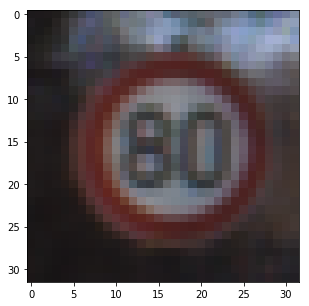

25


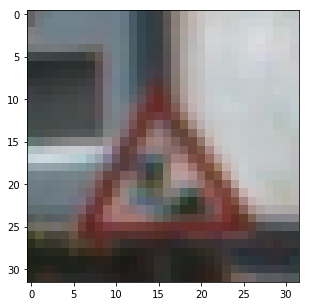

6


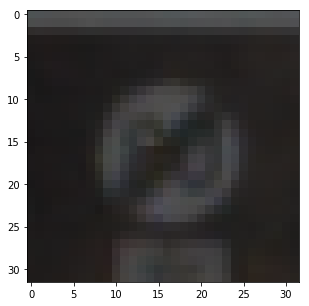

11


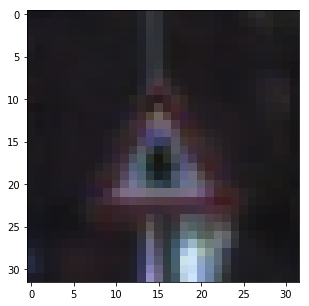

23


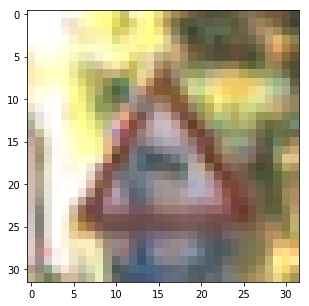

1


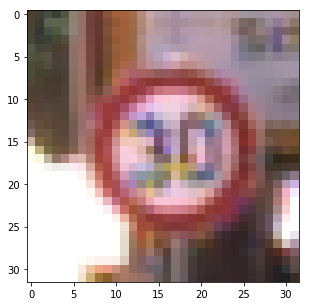

23


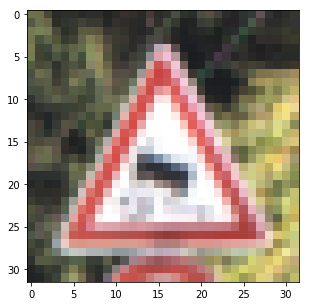

0


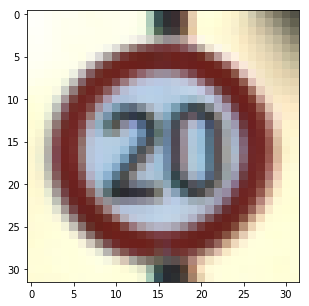

16


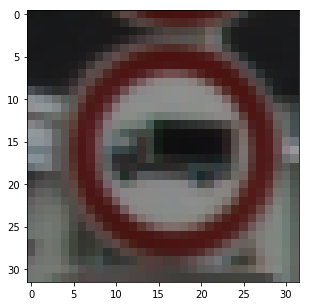

9


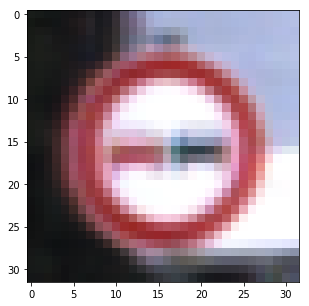

4


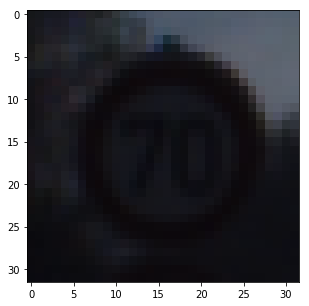

26


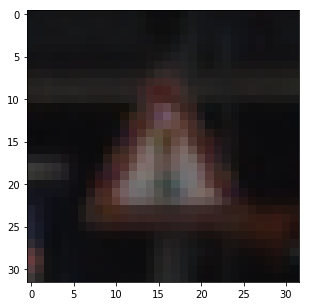

3


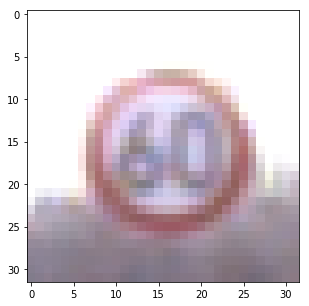

25


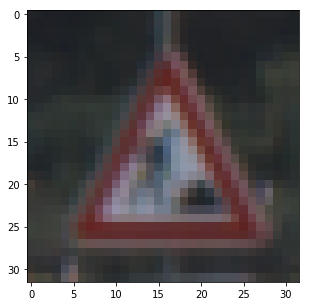

11


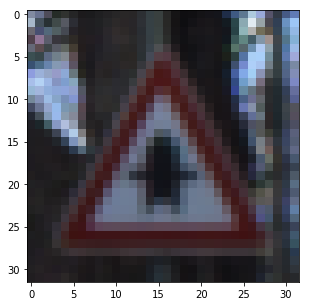

13


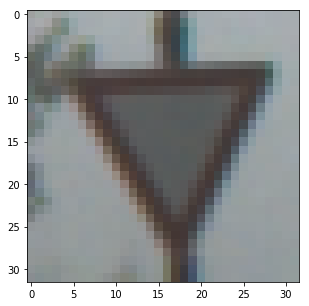

30


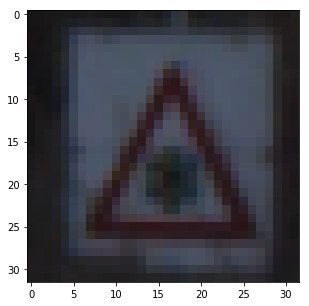

2


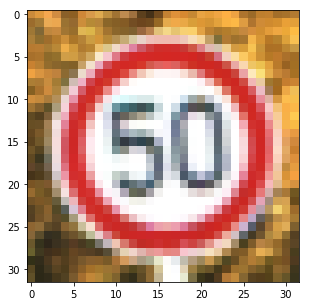

28


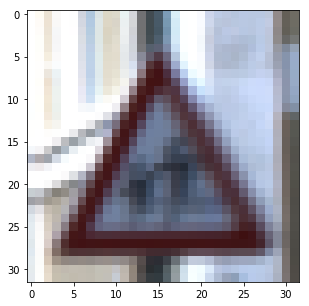

In [4]:
for i in range(1,20):
    index = random.randint(0, len(X_train))
    image = X_train[index]
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    print(y_train[index])
    plt.show()

The images appear to be of appropriate size and they have appropriate translation. However some of the images are very bright or very dark.

One idea might be to visualize the brightness of the image to roughyl see the brightness situation.



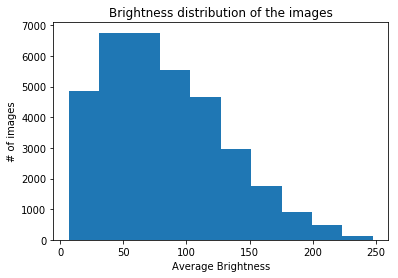

In [5]:
plt.figure()
plt.hist(np.mean(np.mean(np.mean(X_train,axis=3),axis =2),axis=1))
plt.xlabel('Average Brightness')
plt.ylabel('# of images')
plt.title('Brightness distribution of the images')
plt.show()


Another measure of the dataset would be the distribution of numbers examples of each sign type:


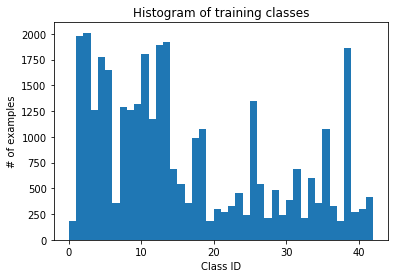

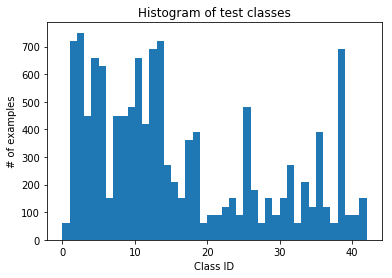

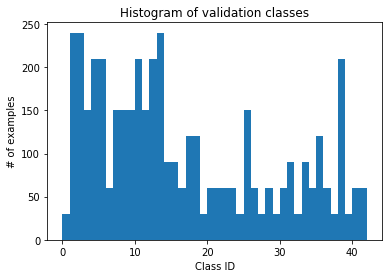

In [6]:
plt.figure()
plt.hist(y_train,normed=0, histtype='bar',bins=range(0, n_classes))
plt.xlabel('Class ID')
plt.ylabel('# of examples')
plt.title('Histogram of training classes')
plt.savefig("OutputFigures/train_dataset_histogram.png")
plt.show()
plt.figure()
plt.hist(y_test,normed=0, histtype='bar',bins=range(0, n_classes))
plt.xlabel('Class ID')
plt.ylabel('# of examples')
plt.title('Histogram of test classes')
plt.savefig("OutputFigures/test_dataset_histogram.png")
plt.show()
plt.figure()
plt.hist(y_valid,normed=0, histtype='bar',bins=range(0, n_classes))
plt.xlabel('Class ID')
plt.ylabel('# of examples')
plt.title('Histogram of validation classes')
plt.savefig("OutputFigures/validation_dataset_histogram.png")
plt.show()

The data is not uniform across the spectrum, however it is uniform across test, train and validation datasets.


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [7]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

In [8]:
def Normalize(X):
    #X = (X-128)/128
    X = X - mean_brightness
    return X

In [9]:
import cv2
def HistogramEqualize(X):
    X_bar = X.copy()
    for i in range (X.shape[0]):
        image = X[i]
        image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        image[:,:,0] = cv2.equalizeHist(image[:,:,0])
        image = cv2.cvtColor(image, cv2.COLOR_YCrCb2RGB)
        X_bar[i] = image
    return X_bar
        
def NormalizeBrightness(X):
    X_bar = X.copy()
    for i in range(X.shape[0]):
        X_bar[i] = X[i] * (mean_brightness / np.mean(X[i]))
    return X_bar

def Shift(X,x_shift, y_shift):
    rot_mat = np.float32([[1,0,x_shift],[0,1,y_shift]])
    X_bar = X.copy()
    for i in range(X.shape[0]):
        image = X[i]         
        rows,cols = image.shape[:2]
        X_bar[i] = cv2.warpAffine(image, rot_mat,(rows,cols),flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return X_bar

def ChangeBrightness(X, brightness):
    X_bar = X.copy()
    for i in range (X.shape[0]):
        image = X[i]
        image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        image[:,:,0] = image[:,:,0] + brightness
        image = cv2.cvtColor(image, cv2.COLOR_YCrCb2RGB)
        X_bar[i] = image
    return X_bar

def ChangeContrast(X, contrast):
    X_bar = X.copy()
    for i in range (X.shape[0]):
        image = X[i]
        image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        image[:,:,0] = image[:,:,0] * contrast
        image = cv2.cvtColor(image, cv2.COLOR_YCrCb2RGB)
        X_bar[i] = image
    return X_bar

def Rotate(X, angle):
    X_bar = X.copy()
    for i in range (X.shape[0]):
        image = X[i]
        center = tuple(np.array(image.shape)[:2]/2) 
        rot_mat = cv2.getRotationMatrix2D(center,angle,1.0)
        rows,cols = image.shape[:2]
        image = cv2.warpAffine(image, rot_mat, (rows,cols),flags=cv2.INTER_CUBIC,borderMode=cv2.BORDER_REPLICATE)
        X_bar[i] = image
    return X_bar
    

In [10]:
import os
import gc
import psutil
gc.collect()

#X_train_concat_1 = np.concatenate((X_train,ChangeContrast(X_train, 1.05)),axis=0)
#y_train_concat_1 = np.concatenate((y_train,y_train), axis=0)


X_train_concat_3 = np.concatenate((X_train,Shift(X_train,2,0)),axis=0)
y_train_concat_3 = np.concatenate((y_train,y_train), axis=0)

X_train_concat_4 = np.concatenate((X_train_concat_3,Shift(X_train,0,2)),axis=0)
y_train_concat_4 = np.concatenate((y_train_concat_3,y_train), axis=0)

X_train_concat_5 = np.concatenate((X_train_concat_4,Shift(X_train,-2,0)),axis=0)
y_train_concat_5 = np.concatenate((y_train_concat_4,y_train), axis=0)

X_train_concat_6 = np.concatenate((X_train_concat_5,Shift(X_train,0,-2)),axis=0)
y_train_concat_6 = np.concatenate((y_train_concat_5,y_train), axis=0)

#X_train_concat_7 = np.concatenate((X_train_concat_6,ChangeBrightness(X_train,10)),axis=0)
#y_train_concat_7 = np.concatenate((y_train_concat_6,y_train), axis=0)


#del X_train_concat_1
#del X_train_concat_2
del X_train_concat_3
del X_train_concat_4
del X_train_concat_5

#del y_train_concat_1
#del y_train_concat_2
del y_train_concat_3
del y_train_concat_4
del y_train_concat_5

#X_train_concat_8 = np.concatenate((X_train_concat_6,ChangeBrightness(X_train,20)),axis=0)
#y_train_concat_8 = np.concatenate((y_train_concat_6,y_train), axis=0)

#X_train_concat_9 = np.concatenate((X_train_concat_8,ChangeBrightness(X_train,-20)),axis=0)
#y_train_concat_9 = np.concatenate((y_train_concat_8,y_train), axis=0)

X_train_concat_10 = np.concatenate((X_train_concat_6,Rotate(X_train,-10)),axis=0)
y_train_concat_10 = np.concatenate((y_train_concat_6,y_train), axis=0)

X_train_concat_11 = np.concatenate((X_train_concat_10,Rotate(X_train,10)),axis=0)
y_train_concat_11 = np.concatenate((y_train_concat_10,y_train), axis=0)

X_train_concat_12 = np.concatenate((X_train_concat_11,Rotate(X_train,-5)),axis=0)
y_train_concat_12 = np.concatenate((y_train_concat_11,y_train), axis=0)

X_train_concat_13 = np.concatenate((X_train_concat_12,Rotate(X_train,5)),axis=0)
y_train_concat_13 = np.concatenate((y_train_concat_12,y_train), axis=0)

X_train_concat = X_train_concat_13.copy()
y_train_concat = y_train_concat_13.copy()
#X_train_concat = X_train.copy()
#y_train_concat = y_train.copy()

del X_train_concat_6
#del X_train_concat_7
#del X_train_concat_9
del X_train_concat_10
del X_train_concat_11
del X_train_concat_12
del X_train_concat_13

del y_train_concat_6
#del y_train_concat_7
#del y_train_concat_9
del y_train_concat_10
del y_train_concat_11
del y_train_concat_12
del y_train_concat_13

gc.collect()

X_train_concat, y_train_concat = shuffle(X_train_concat, y_train_concat)

In [11]:
# In order to revert the effects of the brightness differences
gc.collect()
X_train_concat = HistogramEqualize(X_train_concat) 
X_test = HistogramEqualize(X_test) 
X_valid =HistogramEqualize(X_valid)  

In [12]:
# Normalize the image to have zero mean and unit variance
gc.collect()
X_train_concat = (X_train_concat - mean_brightness)/128 
X_test = (X_test - mean_brightness)/128 
X_valid = (X_valid - mean_brightness)/128 
#y_train_concat = y_train

In [13]:
print (str(X_train_concat.shape) + " , " + str(X_train.shape))
print (np.mean(X_train_concat))
print (np.var(X_train_concat))

(313191, 32, 32, 3) , (34799, 32, 32, 3)
0.384969595683
0.342636429494


### Model Architecture

I begin with LeNet as in example, I modified the input layer to accomodate 3 color channels.

In [14]:
import tensorflow as tf
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten

keep_prob = tf.placeholder(tf.float32) # probability to keep units

In [15]:


def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    # output = 43 for traffic sign classifier
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

This model was designed with 28x28 gray scale images with 10 classes. It probably underfits the traffic sign data, so next thing I'll try is to increase the model size.

My first thought is, since there are 4x more classes, I should increse the width of the layers 4x at each layer

In [16]:


def LeNet4x(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 24), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(24))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 24, 64), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(64))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1600, 480), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(480))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(480, 336), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(336))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    # output = 43 for traffic sign classifier
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(336, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

Increasing the layer widths to 4x increases the accuracy of the validation set to 0.976. But the acuracy of the test set is significantly below this number. So the network overfits the data.

Next, I'll decrease the widths to half.

In [17]:


def LeNet2x(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 12), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(12))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 12, 32), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(32))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(800, 240), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(240))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(240, 168), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(168))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    # output = 43 for traffic sign classifier
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(168, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

With 2x widths, the prediction accuracy is at 0.971 but the test result is much better. Still I'll decrease the widths a bit more and see what happens.

In [31]:

def LeNet2xSmaller(x): 
    with tf.variable_scope('LeNet'):
        # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
        mu = 0
        sigma = 0.1
    
        # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
        #conv1_W = tf.Variable('conv1_W',tf.truncated_normal(shape=(5, 5, 3, 10), mean = mu, stddev = sigma))
        conv1_W = tf.get_variable('conv1_W',initializer=tf.truncated_normal(shape=(5, 5, 3, 10), mean = mu, stddev = sigma))
        conv1_b = tf.Variable(tf.zeros(10))
        conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

        # SOLUTION: Activation.
        conv1 = tf.nn.relu(conv1)

        # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
        conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

        # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
        conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 10, 24), mean = mu, stddev = sigma))
        conv2_b = tf.Variable(tf.zeros(24))
        conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
        # SOLUTION: Activation.
        conv2 = tf.nn.relu(conv2)

        # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
        conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

        # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
        fc0   = flatten(conv2)
    
        # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
        fc1_W = tf.Variable(tf.truncated_normal(shape=(600, 200), mean = mu, stddev = sigma))
        fc1_b = tf.Variable(tf.zeros(200))
        fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
        # SOLUTION: Activation.
        fc1    = tf.nn.relu(fc1)
        fc1 = tf.nn.dropout(fc1, keep_prob)

        # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
        fc2_W  = tf.Variable(tf.truncated_normal(shape=(200, 140), mean = mu, stddev = sigma))
        fc2_b  = tf.Variable(tf.zeros(140))
        fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
        # SOLUTION: Activation.
        fc2    = tf.nn.relu(fc2)
        fc2 = tf.nn.dropout(fc2, keep_prob)

        # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
        # output = 43 for traffic sign classifier
        fc3_W  = tf.Variable(tf.truncated_normal(shape=(140, 43), mean = mu, stddev = sigma))
        fc3_b  = tf.Variable(tf.zeros(43))
        logits = tf.matmul(fc2, fc3_W) + fc3_b
    
        return logits

The validation accuracy of this network is 0.971 while test accuracy is close enough at 0.955. I will continue with this network in the forecomming sections of the project.

In [32]:


def LeNetWithLargerFullyConv(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 12), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(12))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 12, 32), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(32))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(800, 240), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(240))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(240, 168), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(168))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    # output = 43 for traffic sign classifier
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(168, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [33]:


def LeNetWithDeeperConnected(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 12), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(12))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 12, 32), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(32))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(800, 480), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(480))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # Additional layer
    fca_W = tf.Variable(tf.truncated_normal(shape=(480, 240), mean = mu, stddev = sigma))
    fca_b = tf.Variable(tf.zeros(240))
    fca   = tf.matmul(fc1, fca_W) + fca_b
    
    # SOLUTION: Activation.
    fca    = tf.nn.relu(fca)
    
    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(240, 168), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(168))
    fc2    = tf.matmul(fca, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    # output = 43 for traffic sign classifier
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(168, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [34]:


def LeNetWithLargerFullyConnected(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 240), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(240))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(240, 168), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(168))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    # output = 43 for traffic sign classifier
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(168, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [35]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
learning_rate = tf.placeholder(tf.float32,shape=[])

one_hot_y = tf.one_hot(y, 43)


In [36]:
rate = 0.001

#logits = LeNet(x)  # Saturated at 0.935
#logits = LeNet4x(x) # 9.976 but overfits the data
#logits = LeNet2x(x) # 0.971 but still overfits
logits = LeNet2xSmaller(x) # 0.971 - good test result
#logits = LeNetWithLargerFullyConnected(x)
#logits = LeNetWithLargerFullyConv(x)
#logits = LeNetWithDeeperConnected(x) 

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimizer.minimize(loss_operation)

In [37]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [38]:


EPOCHS = 40
BATCH_SIZE = 256

I have observed that with learning rate 0.001 the validation error of the network cannot settle within a small range. However I want the initial learning phase to be fast too. So the best method I have come up with is to gradually reduce the learning rate

In [39]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
validation_acuracy_history = np.zeros( EPOCHS)
test_acuracy_history = np.zeros(EPOCHS)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_concat[offset:end], y_train_concat[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, learning_rate: rate, keep_prob:0.5})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        validation_acuracy_history[i] = validation_accuracy
        
        test_accuracy = evaluate(X_test, y_test)
        test_acuracy_history[i] = test_accuracy
        
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        if i > 30 :
            rate = 0.0003
        elif i>25 :
            rate = 0.0005
        
        
    saver.save(sess, './lenet')
    print("Model saved")
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))


Training...

EPOCH 1 ...
Validation Accuracy = 0.580

EPOCH 2 ...
Validation Accuracy = 0.763

EPOCH 3 ...
Validation Accuracy = 0.833

EPOCH 4 ...
Validation Accuracy = 0.871

EPOCH 5 ...
Validation Accuracy = 0.895

EPOCH 6 ...
Validation Accuracy = 0.905

EPOCH 7 ...
Validation Accuracy = 0.924

EPOCH 8 ...
Validation Accuracy = 0.935

EPOCH 9 ...
Validation Accuracy = 0.948

EPOCH 10 ...
Validation Accuracy = 0.944

EPOCH 11 ...
Validation Accuracy = 0.954

EPOCH 12 ...
Validation Accuracy = 0.960

EPOCH 13 ...
Validation Accuracy = 0.954

EPOCH 14 ...
Validation Accuracy = 0.959

EPOCH 15 ...
Validation Accuracy = 0.961

EPOCH 16 ...
Validation Accuracy = 0.970

EPOCH 17 ...
Validation Accuracy = 0.972

EPOCH 18 ...
Validation Accuracy = 0.966

EPOCH 19 ...
Validation Accuracy = 0.973

EPOCH 20 ...
Validation Accuracy = 0.967

EPOCH 21 ...
Validation Accuracy = 0.974

EPOCH 22 ...
Validation Accuracy = 0.978

EPOCH 23 ...
Validation Accuracy = 0.972

EPOCH 24 ...
Validation Accura

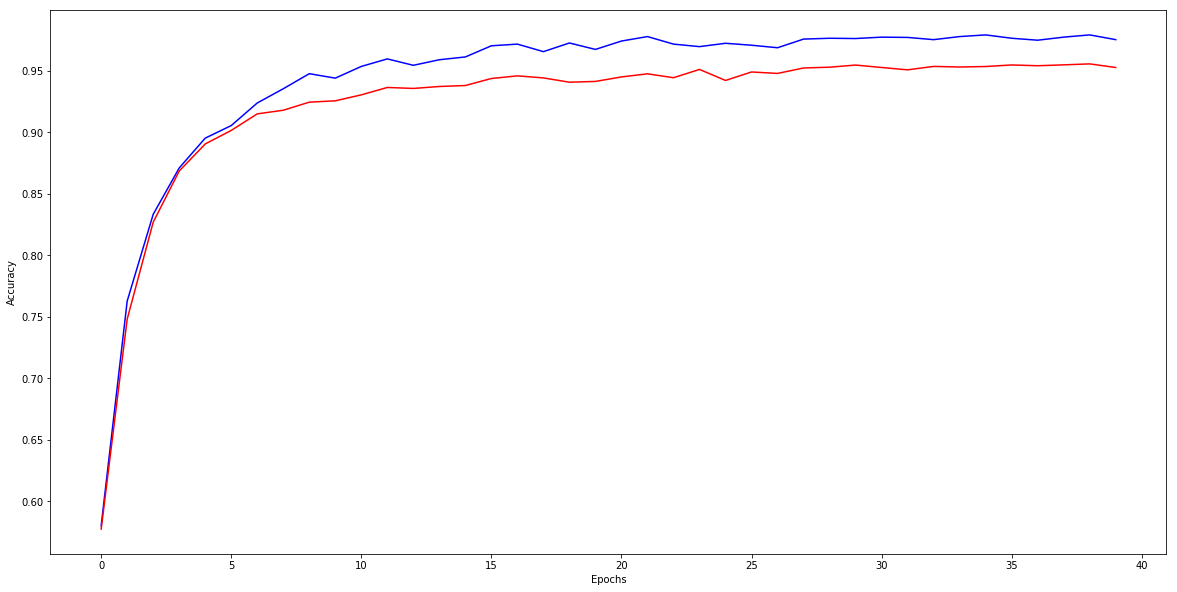

In [40]:

import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
plt.figure(figsize=(20, 10))
plt.plot(validation_acuracy_history,'b')
plt.plot(test_acuracy_history,'r')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

TestImages/1.jpg
TestImages/2.jpg
TestImages/3.jpg
TestImages/4.jpg
TestImages/5.jpg
(5, 32, 32, 3)


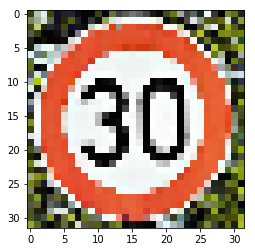

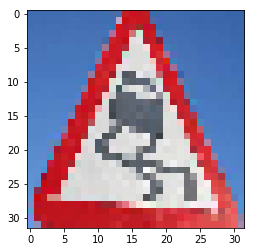

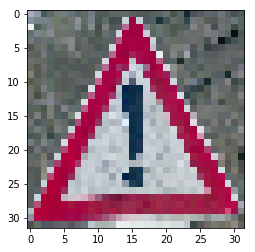

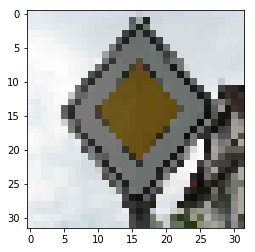

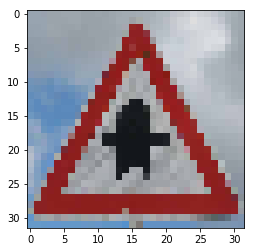

In [41]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpim

images = []
for i in range(1,6):
    filename = "TestImages/" + str(i) + ".jpg"
    print (filename)
    img = mpim.imread(filename) 
    img = cv2.resize(img,(32,32),cv2.INTER_CUBIC)
    plt.figure()
    plt.imshow(img)
    images.append(img)
  

print(np.asarray(images).shape) 
labels = [1, 23, 18, 12, 11]

The test images are plotted above. The test set includes one circular, one rotated square, and three rectangular signs. 

The rotated square is the easiest to classify because both the shape and the color of the sign significantly distinguishes it from the other signs.

The rectangle images are relatively harder for the network to classify, since they have the same outline. But the interiors are distinct enough to classify.

The circular sign is the hardest to recognize since there are similar classes in the dataset. 7 of the 8 initial entries in the name definitions are  speed limit signs. The difference between the most speed limit signs is only one character at the left.

### Predict the Sign Type for Each Image

In [42]:
#Preprocess the images
images = HistogramEqualize(np.asarray(images) )
images = (images - mean_brightness)/128 

In [43]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    predicted_labels = sess.run(tf.argmax(logits, 1), feed_dict={x: images,keep_prob: 1.0})
    print("Predicted labels: ",predicted_labels)

Predicted labels:  [ 1 31 18 12 11]


### Analyze Performance

In [44]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(images, labels)
    print("Test Accuracy on New Images = {:.3f}".format(test_accuracy))

Test Accuracy on New Images = 0.800


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [45]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    softmax_logits = sess.run(tf.nn.softmax(logits), feed_dict={x: images, keep_prob: 1.0})
    top_5 = tf.nn.top_k(softmax_logits, k=5, sorted=True)
    top_5_results = sess.run(top_5)
    print("Top five probabilities in order are :\n",top_5_results.values)
    print(" \n")
    print("Top five class predictions in order are :\n",top_5_results.indices)


Top five probabilities in order are :
 [[  8.87397170e-01   1.12599753e-01   3.01807495e-06   5.04602480e-12
    4.81994913e-12]
 [  8.79302561e-01   6.47750720e-02   4.94715720e-02   4.68364637e-03
    5.23804163e-04]
 [  1.00000000e+00   7.92780619e-17   2.79018029e-18   4.45804152e-29
    1.74201765e-34]
 [  1.00000000e+00   3.55147680e-17   8.96663453e-18   7.68227698e-18
    2.03010264e-18]
 [  9.99896407e-01   1.03596452e-04   3.40346466e-11   2.37826842e-11
    1.11450129e-12]]
 

Top five class predictions in order are :
 [[ 1  2  5  3 14]
 [31 23 21 19  2]
 [18 27 26 24 11]
 [12 26  6  3 13]
 [11 30  3 21 25]]


**Observations about the outputs** 
I predicted the speed limit sign, which was the first in our test set, was hardest to detect. However it was classified correctly, and as seen in the softmas probabilities, with relative certainity.

My another prediction was that the fourth sign (the rotated square shape) was easiest to detect. As the softmax probabilities suggest, the network was almost certain about this element.

The network classified the third and the fifth image relatively certainly too. But to my surprise, it misclassified the second image. It only detected the correct answer in the second prediction with a very small certainity relative to first prediction.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


(5, 5, 3, 10)


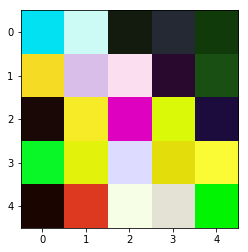

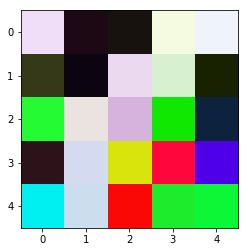

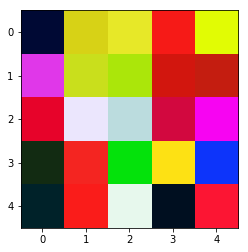

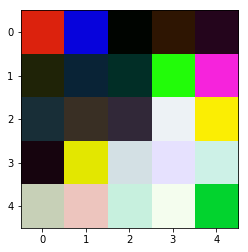

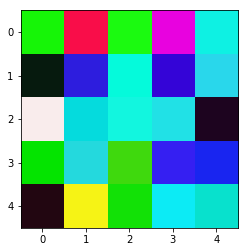

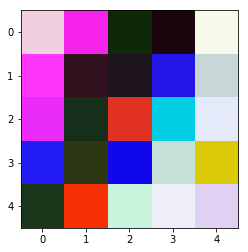

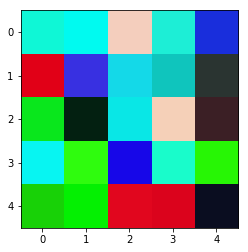

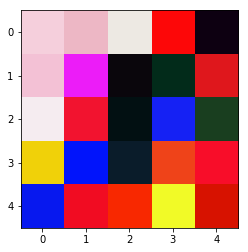

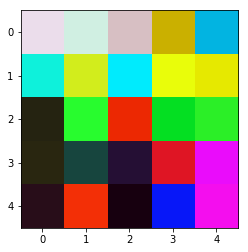

In [56]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    #image_input = HistogramEqualize(image_input) 
    #image_input = (image_input - mean_brightness)/128 
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input, keep_prob: 1.0})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
            
            
image = images[0]
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    with tf.variable_scope('LeNet', reuse=True):
        c1 = tf.get_variable('conv1_W')
        conv1_W = sess.run(tf.get_variable('conv1_W'))
        print(conv1_W.shape)
        for i in range(1,10):
            plt.figure()
            plt.imshow(conv1_W[:,:,:,i])
        #outputFeatureMap(image,c1)
            